# Data Preparation of Stackoverflow surveys for job satisfaction

This notebook looks at stackoverflow surveys duriring five consequent years from 2015-2020 with the aim to realize general job satisfaction of developers according to the surveys [here](https://insights.stackoverflow.com/survey)

#### Run the cells below to get started.

In [2]:
# Importing python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

survey = "./surveys_results/survey_results_public_"
mod_df = "./modified_results/modified_survey_results_public_" 

There are 5 surveys results stored as CSV format in "surveys_results" folder. Each year there are differnces in questionier asked from IT persons/Develpoers to answer them. But there are some questions repeated in each year. Our focus is to use fields in the results that belong to such questions like country of residence or salary.
First we look to country of residence from the 2015 and 2016.

In [3]:
# Reading country results from 2016 and 2015
df_2015 = pd.read_csv(survey+"2015.csv.gz", usecols=['Country'], skiprows=1, compression='gzip') #2015 country results

df_2018 = pd.read_csv(survey+"2018.csv.gz", usecols=['Country'], compression='gzip') #2016 country results

Lets have a look to number of unique countries in these two datasets.

In [4]:
# 2015 unique countries
print("Lenght of 2015:", len(df_2015.Country.unique()))
print("Lenght of 2018:", len(df_2018.Country.unique()))

Lenght of 2015: 157
Lenght of 2018: 181


There are different number of ccountries in each dataframe. Also there are some countries which have different naming in each one of these surveys. For example 'Viet Nam' in 2018 and 'Vietnam' in 2015 or 'Syria' in 2015 and 'Syrian Arab Republic' in 2018. Also there is 'un_subregion' column in 2016 results which not exist in other results. For this reason we have to modify columns value to have same name and later we can categorize them as continent or subregion.

In [5]:
# example of dis-similarity between country names in data sets.
unique_2018 =[]
for x in df_2018.Country.unique():
    unique_2018.append(x)

unique_2015 =[]
for x in df_2015.Country.unique():
    unique_2015.append(x)
    
for x in unique_2018:
    if x not in unique_2015:
        print(x,', ',end="")


Iran, Islamic Republic of... , Hong Kong , Other Country (Not Listed Above) , Micronesia , Yemen , Fiji , Burundi , Lesotho , Marshall Islands , Malawi , Libya , Guinea , Côte d'Ivoire , Central African Rep , Monaco , Gambia , Palau , Grenada , Belize , Suriname , East Timor , Dominica , Saint Lucia , Niger , Guyana , Nauru , Mali , Liberia , Cape Verde , Eritrea , Guinea-Bissau , 

# Part I: Removing dissimilarity among datasets
 
 Removing differences in country names. Adding 'un-subregion' and 'Continent' to data sets by creating new datasets.

### Results from 2015

In [6]:
# columns to be used for reding 2015 results 
col_2015=['Country','Age','Gender',
          'Training & Education: BS in CS',
          'Training & Education: No formal training',
          'Training & Education: Some college, but no CS degree',
          'Training & Education: Masters in CS',
          'Training & Education: PhD in CS','Compensation',
          'Employment Status','Job Satisfaction']

# Reading selected columns
df_2015 = pd.read_csv("./surveys_results/survey_results_public_"+"2015.csv.gz", 
                      usecols=col_2015, skiprows=1, compression='gzip')

To find differnces in country names we check all the data sets with one unique list from 'country_continent.csv' file. So we can add continent and subregion to data frame which miss it.

In [131]:
# loading list of countries and their properties
df_country = pd.read_csv('./country_continent.csv', encoding = "ISO-8859-1")

uniques =[]
for x in df_country.country.unique():
    uniques.append(x)


In [25]:
# checking which countries have different name from this list and modify them for 2015 results. 
# It seems in 2015 similarity is ok
unique_country =[]
for x in df_2015.Country.unique():
    unique_country.append(x)

for x in unique_country:
    if x not in uniques:
        print(x,'","',end="")


In 2015 survey results university education level are separated in different cloumns. Lets merge them in one column as **'FormalEducation'**.

In [9]:
#not_null_col = df_2015
edu_col = ['Training & Education: BS in CS','Training & Education: No formal training',
           'Training & Education: Some college, but no CS degree',
           'Training & Education: Masters in CS',
           'Training & Education: PhD in CS']

# This dictionary used to make consistency between all survey results
edu_value={'Training & Education: BS in CS':"Bachelor degree (BA, BS, B.Eng., etc.)",
          'Training & Education: No formal training':"I never completed any formal education",
          'Training & Education: Some college, but no CS degree':"Some college/university study without earning a degree",
          'Training & Education: Masters in CS':"Master degree (MA, MS, M.Eng., MBA, etc.)",
          'Training & Education: PhD in CS':"Other doctoral degree (Ph.D, Ed.D., etc.)"}

not_null_col = [] # store not null columns

# creating new column as 'FormalEducation' education and updating it's value
for col in edu_col:
    not_null_col = df_2015[col][df_2015[col].notnull()==True].index
    df_2015.loc[not_null_col,'FormalEducation']=edu_value[col]


In [10]:
# lets check FormalEducation column
df_2015.FormalEducation.unique()

array(['Master degree (MA, MS, M.Eng., MBA, etc.)', nan,
       'Bachelor degree (BA, BS, B.Eng., etc.)',
       'I never completed any formal education',
       'Some college/university study without earning a degree',
       'Other doctoral degree (Ph.D, Ed.D., etc.)'], dtype=object)

Now we can drop the other 5 columns by having new **'FormalEducation'** column

In [11]:
# dropping education columns
df_2015.drop(columns=edu_col, inplace=True)

In [12]:
# Correcting N/A value of country to nan
#df_2015.loc[df_2015['Country']=='N/A', 'Country']=np.nan

In [13]:
np.sum(df_2015['Country'].isnull()==True)

807

Adding **'un_subregion'** and **'Continent'** columns for further comparison

In [323]:
subregion=[] #np.array(df_2015.shape[0])
continent=[] #np.array(df_2015.shape[0])
counter=0
for x in df_2015['Country']:
    temp1 = df_country.loc[df_country['country']==x,'sub_region'].tolist()[0]
    temp2 = df_country.loc[df_country['country']==x,'continent'].tolist()[0]
    if temp1 in df_country.country and temp2 in df_country.country:
        subregion.append(temp1)
        continent.append(temp2)
        
    #if x :
       # subregion.append(df_country.loc[df_country['country']==x,'sub_region']) # list of sub-regions that country belongs to it
       # continent.append(df_country.loc[df_country['country']==x,'continent'])  # List of continents  that country belongs to it
        #subregion[counter]=df_country.loc[df_country['country']==x,'sub_region'].tolist()[0]
        #continent[counter]=df_country.loc[df_country['country']==x,'continent'].tolist()[0]
        counter+=1
    else:
        print('nan')
        subregion.append(np.nan)
        continent.append(np.nan)
        counter+=1
        
        #subregion.append(df_country.loc[df_country['country']==x,'sub_region']) # list of sub-regions that country belongs to it
        #continent.append(df_country.loc[df_country['country']==x,'continent'])  # List of continents  that country belongs to it


# Adding two lists to dataframe if their length are equal to dataframe size
if len(subregion)== df_2015.shape[0]:
    df_2015['UN_subregion']=subregion
else:
    print('error: subregion size mismatch')

        
if len(subregion)== df_2015.shape[0]:
        df_2015['Continent'] = continent
else:
        print('error: continent size mismatch')


nan
nan
nan
nan
nan
nan


IndexError: list index out of range

In [15]:
subregion=[]
continent=[] 
counter=0

check_nan = df_2015['Country'].isnull()

for i in range(df_2015.shape[0]):
    x = df_2015.iloc[i]['Country']
    if ~check_nan[i]:
        subregion.append(df_country.loc[df_country['country']==x,'sub_region'].tolist()[0])
        continent.append(df_country.loc[df_country['country']==x,'continent'].tolist()[0])
            
    else:
        subregion.append(np.nan)
        continent.append(np.nan)
        counter+=1

        
# Adding two lists to dataframe if their length are equal to dataframe size
if len(subregion)== df_2015.shape[0]:
    df_2015['UN_subregion']=subregion
else:
    print('error: subregion size mismatch')

        
if len(subregion)== df_2015.shape[0]:
        df_2015['Continent'] = continent
else:
        print('error: continent size mismatch')


In [22]:
df_2015.Gender.unique()

array(['Male', 'Prefer not to disclose', 'Female', nan, 'Other'],
      dtype=object)

#### Last thing : saving new dataframe df_2015 for further analysis

In [387]:
# saving prepared dataframe into new CSV file
df_2015.to_csv(mod_df+"2015.csv.gz", index=False, header=True, compression='gzip')

In [53]:
df_2015['Employment Status'].unique()

array(['Employed full-time', 'Freelance / Contractor',
       'Employed part-time', 'Other', nan, "I'm a student", 'Unemployed',
       'Prefer not to disclose', 'Retired'], dtype=object)

### Results from 2016

In [32]:
# reading dataframe
col_2016=['country','un_subregion','age_range','gender',
          'salary_range','employment_status',
          'company_size_range','job_satisfaction','education']

df_2016 =  pd.read_csv(survey+'2016.csv.gz',usecols=col_2016, compression='gzip')

First we make the country become same with our refrence also adding 'Continent' column to dataframe.  

In [33]:
# checking which countries have different name from this list and modify them for 2016 results. 
# It seems in 2015 similarity is ok
unique_country =[]
for x in df_2016.country.unique():
    unique_country.append(x)

for x in unique_country:
    if x not in uniques:
        print(x,'","',end="")

Other (please specify) ","

There is only one difference **'Other (please specify)'**. If any cell value in country column  **'un_subregion'**  

In [34]:
# Finding index of the rows with 'Other (please specify)'
index = df_2016[df_2016['country']=='Other (please specify)'].index

# changing their value to 'Other'
df_2016.loc[index,'country'] = 'Other'

Int64Index([ 4506, 14959, 14960, 14961, 14962, 14963, 14964, 31197, 31198,
            31199, 31200, 31201, 31202, 31203, 31204, 31205, 31206, 31207,
            31208, 31209, 31210, 31211, 31212, 31213, 48738, 48739, 48740,
            48741, 54318],
           dtype='int64')

In [46]:
subregion=[]
continent=[] 
counter=0

check_nan = df_2016['country'].isnull()

for i in range(df_2016.shape[0]):
    x = df_2016.iloc[i]['country']
    if ~check_nan[i]:
        subregion.append(df_country.loc[df_country['country']==x,'sub_region'].tolist()[0])
        continent.append(df_country.loc[df_country['country']==x,'continent'].tolist()[0])
            
    else:
        subregion.append(np.nan)
        continent.append(np.nan)
        counter+=1

        
# Adding two lists to dataframe if their length are equal to dataframe size
if len(subregion)== df_2016.shape[0]:
    df_2016['UN_subregion']=subregion
else:
    print('error: subregion size mismatch')

        
if len(subregion)== df_2016.shape[0]:
        df_2016['Continent'] = continent
else:
        print('error: continent size mismatch')




In [ ]:
# If continent and subregion added as without any problem we drop old un_subregion column
df_2016.drop(columns=['un_subregion'], inplace=True)

There is only one difference between 2015 and 2016 employment status and it's the 'Other' and 'Other (please specify)'. Lets make it be 'Other'.

In [58]:
# for employment status make consistency
df_2016.employment_status.loc[df_2016.employment_status=='Other (please specify)'] = 'Other'

In 2016 results the field of education have multiple decisions as string in each row. We need to make a new 'FormalEducation' column with selected option from the list.

In [61]:
# example of concatanated example
df_2016.education[1]


"I'm self-taught; On-the-job training; B.S. in Computer Science (or related field)"

In [84]:
# load all unique education strings from the dataframe
edu_strings = df_2016.education.unique()

# separate strings found by split function
splited_list = []

for edu in edu_strings:
    if type(edu) != int and type(edu) != float:
        for x in edu.split('; '):
            if x not in splited_list:
                splited_list.append(x)

In [85]:
# Founded unique strings
splited_list

["I'm self-taught",
 'On-the-job training',
 'B.S. in Computer Science (or related field)',
 'Online class (e.g. Coursera, Codecademy, Khan Academy, etc.)',
 'B.A. in Computer Science (or related field)',
 'Masters Degree in Computer Science (or related field)',
 'Some college coursework in Computer Science (or related field)',
 'Full-time, intensive program (e.g. "boot-camp")',
 'Industry certification program',
 'PhD in Computer Science (or related field)',
 'Part-time program (e.g. night school)',
 'Mentorship program (e.g. Flatiron School, GDI, etc.)']

Now wee need to check each column and put the match into 'FormalEducation' list to be similar to 2015 results.

In [86]:
df_2015.FormalEducation.unique()

array(['Master degree (MA, MS, M.Eng., MBA, etc.)', nan,
       'Bachelor degree (BA, BS, B.Eng., etc.)',
       'I never completed any formal education',
       'Some college/university study without earning a degree',
       'Other doctoral degree (Ph.D, Ed.D., etc.)'], dtype=object)

In [104]:
# dictionary for equivalent string
edu_dic={"I'm self-taught": 'I never completed any formal education',
        'B.S. in Computer Science (or related field)':'Bachelor degree (BA, BS, B.Eng., etc.)',
        'B.A. in Computer Science (or related field)':'Bachelor degree (BA, BS, B.Eng., etc.)',
        'Masters Degree in Computer Science (or related field)':'Master degree (MA, MS, M.Eng., MBA, etc.)',
        'PhD in Computer Science (or related field)':'Other doctoral degree (Ph.D, Ed.D., etc.)'}

# check if key exist in a dictionary or not
def checkKey(dict, key):
    if key in dict.keys():
        return True
    else:
        return False

# finding equivalent degree for each syrvey result
formal_edu=[]
for edu_str in df_2016.education:
    if type(edu_str) != int and type(edu_str) != float:
        edu_list = edu_str.split('; ')
        check = True
        value=''
        for x in edu_list:
            if checkKey(edu_dic, x) and check:
                check=False
                value=edu_dic[x]
        if check:
            formal_edu.append('I never completed any formal education')
        else:
            formal_edu.append(value)
    else:
        formal_edu.append(np.nan)

# Adding new column as 'FormalEducation' to dataframe
if len(formal_edu) == df_2016.shape[0]:
    df_2016['FormalEducation'] = formal_edu
    print('New column succesfully added')
else:
    print('error: size mismatch to add new column')

New column succesfully added


Now we check the company size values and make it consistent to what we need

In [141]:
df_2016.company_size_range.unique()

array([nan, '100-500', 'I am not part of a company', '10-19',
       '5-9 employees', '20-99', '<10', '500-999', '1000', '10000+',
       '5000-9999', 'I am not sure', 'I prefer not to answer'],
      dtype=object)

In [140]:
# change the column values
col = ["100-499 employees","I am not part of a company","10-19 employees",
       "5-9	employees","20-99 employees","1-4 employees",
       "500-999 employees","1,000-4,999 employees","10,000+ employees",
       "5,000-9,999 employees","I am not sure","Other (please specify)"] #Changing thses to new one

# Modified values
mod = ["100-500","I am not part of a company",
       "10-19","<10","20-99","<10","500-999",
       "1000","10000+","5000-9999","I am not sure",
       "I prefer not to answer"]

for i in range(len(col)):
    df_2016.company_size_range.replace(col[i], mod[i], inplace=True)

In [111]:
df_2016.salary_range.replace('Other (please specify)','Other', inplace=True)

#### Saving the dataframe for later analysis

In [114]:
# saving prepared dataframe into new CSV file
df_2016.to_csv(mod_df+"2016.csv.gz", index=False, header=True, compression='gzip')

### Results from 2017

We again check the dataframe to find dissimilarities and find a way to correct them

In [119]:
# columns that could be helpfull in analyzing this dataset
col_2017 = ['Professional','Country','EmploymentStatus',
            'FormalEducation','CompanySize', 'CareerSatisfaction','JobSatisfaction',
            'JobSecurity','Gender',
            'Salary','ExpectedSalary']

# reading data from CSV file
df_2017 =  pd.read_csv(survey+'2017.csv.gz',usecols=col_2017, compression='gzip')


In [132]:
# checking which countries have different name from this list and modify them for 2016 results. 
# It seems in 2015 similarity is ok
unique_country =[]
for x in df_2017.Country.unique():
    unique_country.append(x)

for x in unique_country:
    if x not in uniques:
        print(x,'","',end="")

In [129]:
# Dissimilarities
col = ["I prefer not to say","Moldavia","Ireland","Aland Islands",
       "New Caledonia (French)","U.S. Minor Outlying Islands",
       "Polynesia (French)","French Guyana","Pitcairn Island","Antigua and Barbuda",
       "Martinique (French)","Macau","Heard and McDonald Islands"] # Columns have naming difference

# Modification
mod =["Other","Moldova","Ireland {Republic}","Åland Islands","New Caledonia",
      "United States Minor Outlying Islands","French Polynesia","Guyana",
      "Pitcairn","Antigua & Deps","Martinique","Macau","Heard and Island and McDonald Islands"]

for i in range(len(col)):
    df_2017.replace(to_replace=col[i], value=mod[i], inplace=True )

First check country and add subregion and continent to it.

In [133]:
subregion=[]
continent=[] 
counter=0

check_nan = df_2017['Country'].isnull()

for i in range(df_2017.shape[0]):
    x = df_2017.iloc[i]['Country']
    if ~check_nan[i]:
        subregion.append(df_country.loc[df_country['country']==x,'sub_region'].tolist()[0])
        continent.append(df_country.loc[df_country['country']==x,'continent'].tolist()[0])
            
    else:
        subregion.append(np.nan)
        continent.append(np.nan)
        counter+=1

        
# Adding two lists to dataframe if their length are equal to dataframe size
if len(subregion)== df_2017.shape[0]:
    df_2017['UN_subregion']=subregion
else:
    print('error: subregion size mismatch')

        
if len(subregion)== df_2017.shape[0]:
        df_2017['Continent'] = continent
else:
        print('error: continent size mismatch')


Changing company size to be consistent

In [159]:
df_2017['EmploymentStatus'].unique()

array(['Not employed, and not looking for work', 'Employed part-time',
       'Employed full-time',
       'Independent contractor, freelancer, or self-employed',
       'Not employed, but looking for work', 'Other', 'Retired'],
      dtype=object)

In [149]:
# change the column values
col = ["20 to 99 employees","10,000 or more employees","10 to 19 employees",
       "Fewer than 10 employees","5,000 to 9,999 employees","100 to 499 employees",
       "1,000 to 4,999 employees","500 to 999 employees",
       "I don't know","I prefer not to answer","Brunei"] #Changing thses to new one

# Modified values
mod = ["20-99","10000+","10-19","<10","5000-9999","100-499","1000-5000","500-1000","I don't know","I prefer not to answer","nan"]

# Replace them with new values
for i in range(len(col)):
    df_2017.CompanySize.replace(col[i], mod[i], inplace=True)

In [150]:
df_2017.CompanySize.unique()

array([nan, '20-99', '10000+', '10-19', '<10', '5000-9999', '100-499',
       '1000-5000', '500-1000', 'nan'], dtype=object)

#### Final step save the dataframe

In [151]:
# saving prepared dataframe into new CSV file
df_2017.to_csv(mod_df+"2017.csv.gz", index=False, header=True, compression='gzip')

### Results from 2018

In [152]:
# columns to be used for reding 2018 results 
col_2018 = ['Country','Employment','FormalEducation',
            'CompanySize','JobSatisfaction','CareerSatisfaction',
            'Salary','SalaryType','ConvertedSalary','Gender','Age']

df_2018 = pd.read_csv(survey+"2018.csv.gz", usecols=col_2018, compression='gzip')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (8,12,13,52,53,120,124) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [192]:
df_2018.Gender.unique()

array(['Male', nan, 'Female', 'genderqueer'], dtype=object)

#### Country and continent
First thing first. Country and continent.

In [154]:
# checking which countries have different name from this list and modify them for 2016 results. 
# It seems in 2015 similarity is ok
unique_country =[]
for x in df_2018.Country.unique():
    unique_country.append(x)

for x in unique_country:
    if x not in uniques:
        print(x,'","',end="")

Iran, Islamic Republic of... ","Other Country (Not Listed Above) ","

In [155]:
# There is only two differences. lets solve them by replace command
df_2018.Country.replace("Iran, Islamic Republic of...", "Iran", inplace=True)
df_2018.Country.replace("Other Country (Not Listed Above)", "Other", inplace=True)



In [157]:
# Adding subregion and continent columns
subregion=[]
continent=[] 
counter=0

check_nan = df_2018['Country'].isnull()

for i in range(df_2018.shape[0]):
    x = df_2018.iloc[i]['Country']
    if ~check_nan[i]:
        subregion.append(df_country.loc[df_country['country']==x,'sub_region'].tolist()[0])
        continent.append(df_country.loc[df_country['country']==x,'continent'].tolist()[0])
            
    else:
        subregion.append(np.nan)
        continent.append(np.nan)
        counter+=1

        
# Adding two lists to dataframe if their length are equal to dataframe size
if len(subregion)== df_2018.shape[0]:
    df_2018['UN_subregion']=subregion
else:
    print('error: subregion size mismatch')

        
if len(subregion)== df_2018.shape[0]:
        df_2018['Continent'] = continent
else:
        print('error: continent size mismatch')


#### Company size
Changing the company size values

In [186]:
col = ["20 to 99 employees","10,000 or more employees","100 to 499 employees",
       "10 to 19 employees","500 to 999 employees",
       "1,000 to 4,999 employees","5,000 to 9,999 employees",
       "Fewer than 10 employees"]

mod = ["20-99","10000+","100-499","10-19","500-99","1000-4999","5000-9999","<10"]

for i in range(len(col)):
    df_2018.CompanySize.replace(col[i], mod[i], inplace=True)

#### Gender
There are different selection for Gende for each column. For see the affect of Gender on job satisfaction we group them in three different cases: Male, Female, genderqueer

In [ ]:
index = df_2018[~df_2018['Gender'].isin(['Male', 'Female', np.nan])].index
df_2018.loc[index, 'Gender'] = 'genderqueer'

#### Formal education

In [193]:
df_2018.FormalEducation.unique()

array(['Bachelor’s degree (BA, BS, B.Eng., etc.)', 'Associate degree',
       'Some college/university study without earning a degree',
       'Master’s degree (MA, MS, M.Eng., MBA, etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       nan, 'Primary/elementary school',
       'Professional degree (JD, MD, etc.)',
       'I never completed any formal education',
       'Other doctoral degree (Ph.D, Ed.D., etc.)'], dtype=object)

In [194]:
df_2017.FormalEducation.unique()

array(['Secondary school',
       "Some college/university study without earning a bachelor's degree",
       "Bachelor's degree", 'Doctoral degree', "Master's degree",
       'Professional degree', 'Primary/elementary school',
       'I prefer not to answer', 'I never completed any formal education'],
      dtype=object)

In [172]:
print(np.sum(df_2018.Salary.notnull()==True))
print(np.sum(df_2018.ConvertedSalary.notnull()==True))
print("ConvertedSalary:",len(df_2018.ConvertedSalary.isnull()))
print("ConvertedSalary:",len(df_2018.ConvertedSalary.unique()))

50578
47702
ConvertedSalary: 98855
ConvertedSalary: 7474


98855

#### Saving 2018 dataframe

In [41]:
df_2018 = pd.read_csv("./surveys_results/survey_results_public_"+"2018.csv.gz", compression='gzip')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


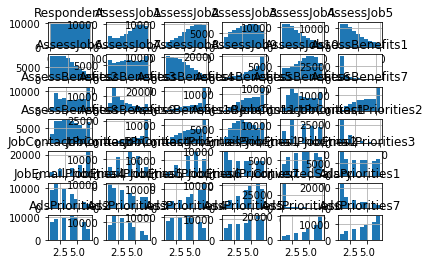

In [37]:
df_2018.hist();

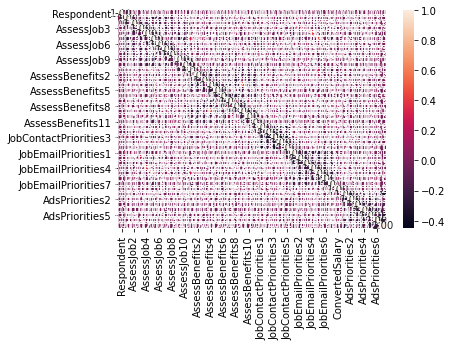

In [39]:
sns.heatmap(df_2018.corr(), annot=True, fmt=".2f");

### Results from 2019

In [173]:
# Selected columns to read from 2019 dataset
col_2019 = ['Employment','Country','EdLevel','OrgSize','DevType','CareerSat','JobSat',
            'CompTotal','CompFreq','ConvertedComp','Ethnicity','Gender']

df_2019 = pd.read_csv(survey+"2019.csv.gz", usecols=col_2019, compression='gzip')

Lets check if there are any dissimilarity between country and the refrence we have. then add continent and subregion columns to dataframe.

In [180]:
# checking which countries have different name from this list and modify them for 2016 results. 
# It seems in 2015 similarity is ok
unique_country =[]
for x in df_2019.Country.unique():
    unique_country.append(x)

for x in unique_country:
    if x not in uniques:
        print(x,'","',end="")

There is just one case and we replace it we 'Other'

In [179]:
df_2019.Country.replace('Other Country (Not Listed Above)', 'Other', inplace=True)

In [182]:
# Adding subregion and continent columns
subregion=[]
continent=[] 
counter=0

check_nan = df_2019['Country'].isnull()

for i in range(df_2019.shape[0]):
    x = df_2019.iloc[i]['Country']
    if ~check_nan[i]:
        subregion.append(df_country.loc[df_country['country']==x,'sub_region'].tolist()[0])
        continent.append(df_country.loc[df_country['country']==x,'continent'].tolist()[0])
            
    else:
        subregion.append(np.nan)
        continent.append(np.nan)
        counter+=1

        
# Adding two lists to dataframe if their length are equal to dataframe size
if len(subregion)== df_2019.shape[0]:
    df_2019['UN_subregion']=subregion
else:
    print('error: subregion size mismatch')

        
if len(subregion)== df_2019.shape[0]:
        df_2019['Continent'] = continent
else:
        print('error: continent size mismatch')
